# FACE MASK DETECTION
### Classification of images into two classes using a CNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [3]:
data = 'dataset'
train = os.path.join(data,'Train')
test = os.path.join(data,'Test')
valid = os.path.join(data,'Validation')

train_mask = os.path.join(train,'Mask')
train_nomask = os.path.join(train,'Non Mask')

In [4]:
train_mask_list = os.listdir(train_mask)
print(train_mask_list[:10])

train_nomask_list = os.listdir(train_nomask)
print(train_nomask_list[:10])

['0003.jpg', '0006.jpg', '0018.jpg', '0019.jpg', '0022.jpg', '0027.jpg', '0029.jpg', '0037.jpg', '0040.jpg', '0042.jpg']
['0.jpg', '1.jpg', '10.jpg', '100.jpg', '101.jpg', '102.jpg', '104.jpg', '105.jpg', '106.jpg', '107.jpg']


In [5]:
import matplotlib.image as mpimg

In [6]:
for i in train_mask_list[0:8]:
    print(i)

0003.jpg
0006.jpg
0018.jpg
0019.jpg
0022.jpg
0027.jpg
0029.jpg
0037.jpg


In [7]:
mask_pic = []
for i in train_mask_list[0:8]:
  mask_pic.append(os.path.join(train_mask,i))

nomask_pic = []
for i in train_nomask_list[0:8]:
  nomask_pic.append(os.path.join(train_nomask,i))

print(mask_pic)
print(nomask_pic)

merged_pics = mask_pic+nomask_pic

['dataset\\Train\\Mask\\0003.jpg', 'dataset\\Train\\Mask\\0006.jpg', 'dataset\\Train\\Mask\\0018.jpg', 'dataset\\Train\\Mask\\0019.jpg', 'dataset\\Train\\Mask\\0022.jpg', 'dataset\\Train\\Mask\\0027.jpg', 'dataset\\Train\\Mask\\0029.jpg', 'dataset\\Train\\Mask\\0037.jpg']
['dataset\\Train\\Non Mask\\0.jpg', 'dataset\\Train\\Non Mask\\1.jpg', 'dataset\\Train\\Non Mask\\10.jpg', 'dataset\\Train\\Non Mask\\100.jpg', 'dataset\\Train\\Non Mask\\101.jpg', 'dataset\\Train\\Non Mask\\102.jpg', 'dataset\\Train\\Non Mask\\104.jpg', 'dataset\\Train\\Non Mask\\105.jpg']


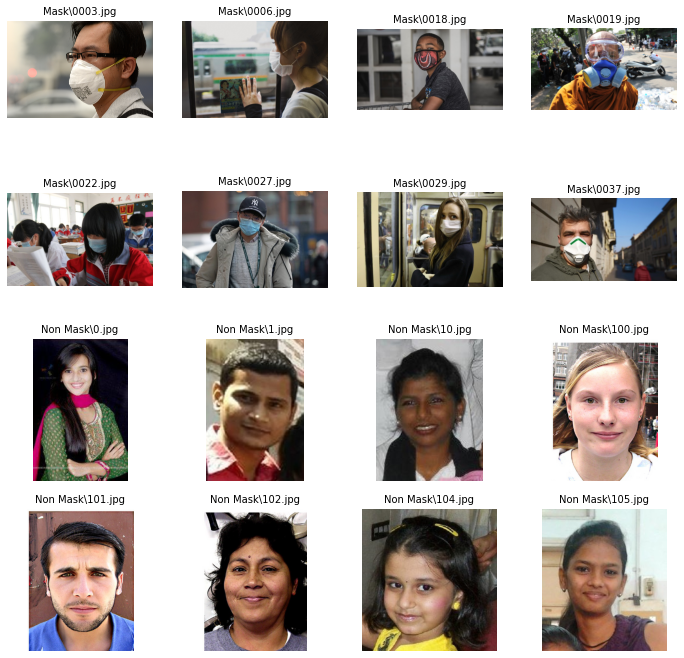

In [8]:
nrows = 4
ncols = 4
plt.figure(figsize=(12,12))

for i in range(0,len(merged_pics)):
  data = merged_pics[i].split('\\',2)[2]
  sp = plt.subplot(4,4,i+1)
  sp.axis('Off')
  image = mpimg.imread(merged_pics[i])
  sp.set_title(data,fontsize=10)
  plt.imshow(image,cmap='gray')

plt.show()

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range = 0.2,
                                   rotation_range = 40,
                                   horizontal_flip = True
                                   )
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train, target_size=(150,150),
                                                    batch_size = 32, class_mode = 'binary'
                                                    )
test_generator = test_datagen.flow_from_directory(test, target_size=(150,150),
                                                    batch_size = 32, class_mode = 'binary'
                                                    )
valid_generator = validation_datagen.flow_from_directory(valid, target_size=(150,150),
                                                    batch_size = 32, class_mode = 'binary'
                                                    )

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [10]:
train_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [11]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

In [12]:
model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
history = model.fit(train_generator, epochs = 30, validation_data = valid_generator)

Epoch 1/30
19/19 [==============================] - 60s 3s/step - loss: 2.8898 - accuracy: 0.5350 - val_loss: 0.6897 - val_accuracy: 0.5065
Epoch 2/30
19/19 [==============================] - 44s 2s/step - loss: 0.5805 - accuracy: 0.6983 - val_loss: 0.4979 - val_accuracy: 0.8497
Epoch 3/30
19/19 [==============================] - 44s 2s/step - loss: 0.3512 - accuracy: 0.8717 - val_loss: 0.3272 - val_accuracy: 0.8922
Epoch 4/30
19/19 [==============================] - 51s 3s/step - loss: 0.3325 - accuracy: 0.8750 - val_loss: 0.4072 - val_accuracy: 0.8824
Epoch 5/30
19/19 [==============================] - 48s 3s/step - loss: 0.3049 - accuracy: 0.8850 - val_loss: 0.2721 - val_accuracy: 0.9020
Epoch 6/30
19/19 [==============================] - 47s 2s/step - loss: 0.2643 - accuracy: 0.9033 - val_loss: 0.3192 - val_accuracy: 0.9118
Epoch 7/30
19/19 [==============================] - 49s 3s/step - loss: 0.2313 - accuracy: 0.9217 - val_loss: 0.2415 - val_accuracy: 0.9183
Epoch 8/30
19/19 [==

Text(0.5, 0, 'epoch')

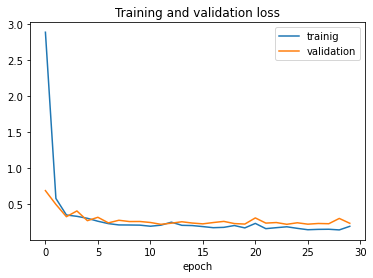

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['trainig','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

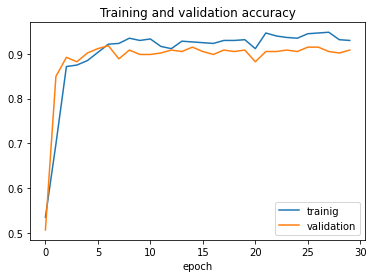

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['trainig','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [17]:
model.save("FaDetNet.h5")

In [ ]:
test_loss , test_acc = model.evaluate(test_generator)
print('test acc :{} test loss:{}'.format(test_acc,test_loss))